In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('amazon_sales_data 2025.csv')

# 1. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             Price    Quantity  Total Sales
count   250.000000  250.000000   250.000000
mean    343.580000    2.856000   975.380000
std     380.635808    1.429489  1252.112254
min      15.000000    1.000000    15.000000
25%      40.000000    2.000000   100.000000
50%     150.000000    3.000000   400.000000
75%     600.000000    4.000000  1500.000000
max    1200.000000    5.000000  6000.000000


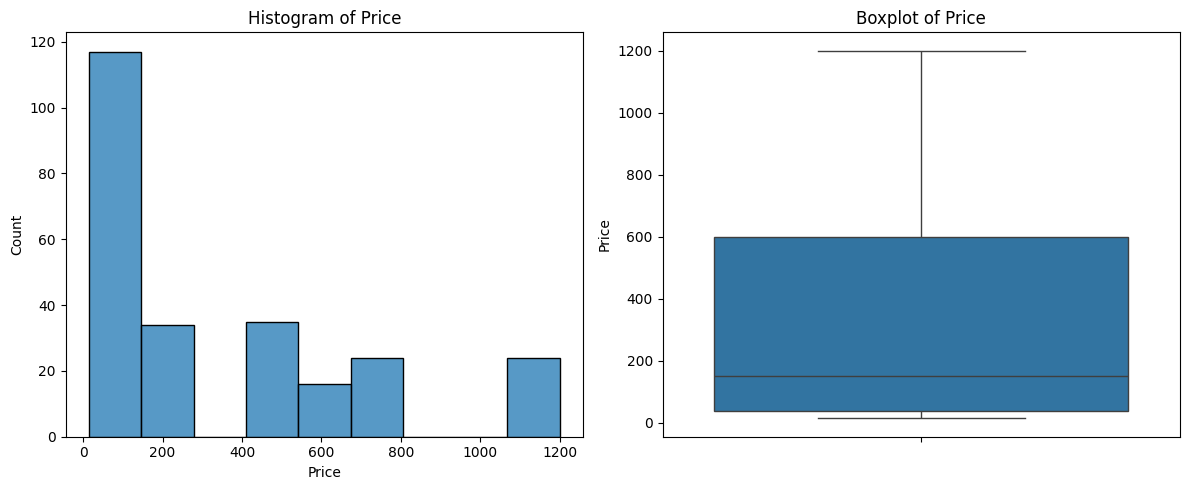

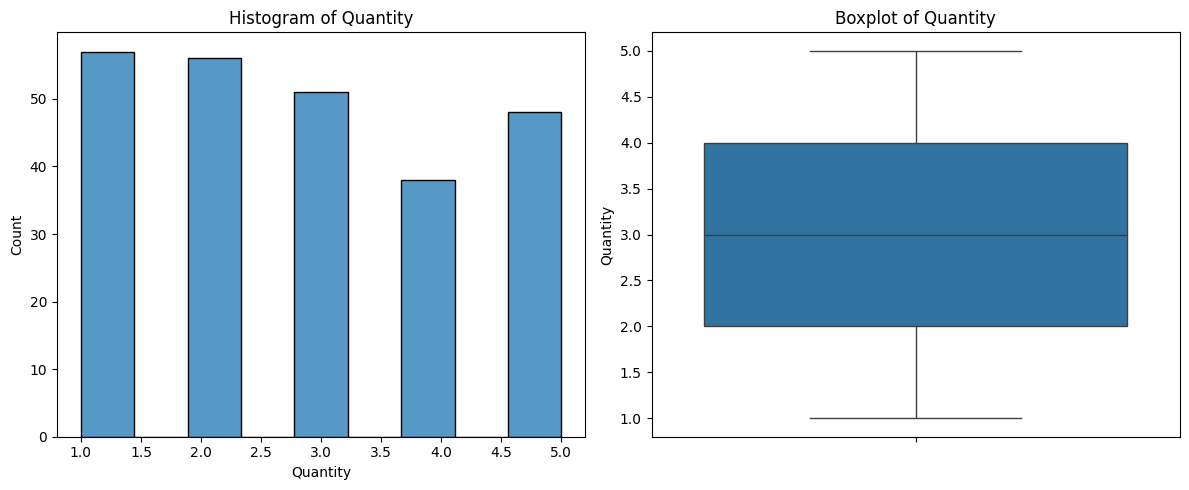

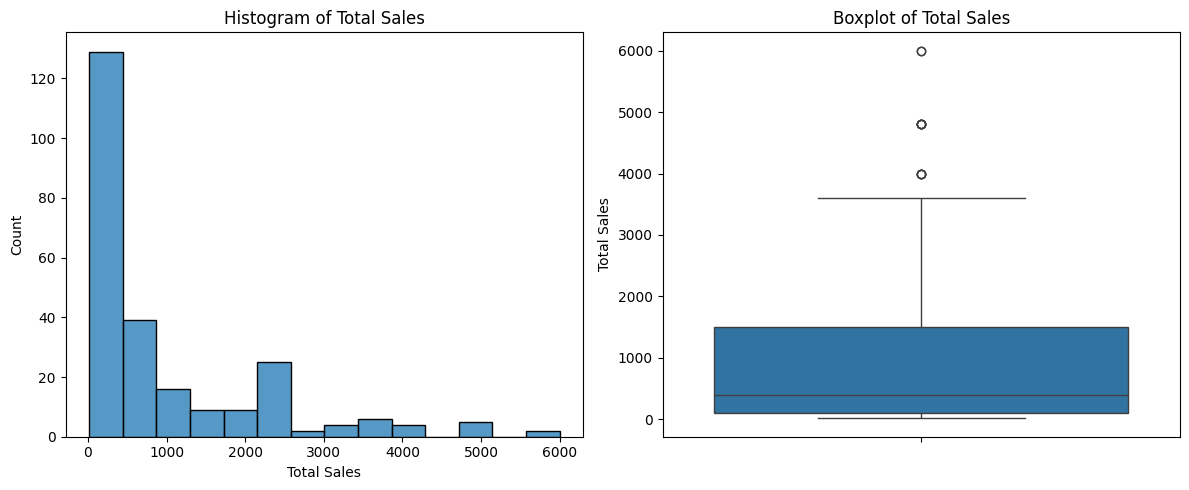

In [6]:
# 2. Histograms and Boxplots
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

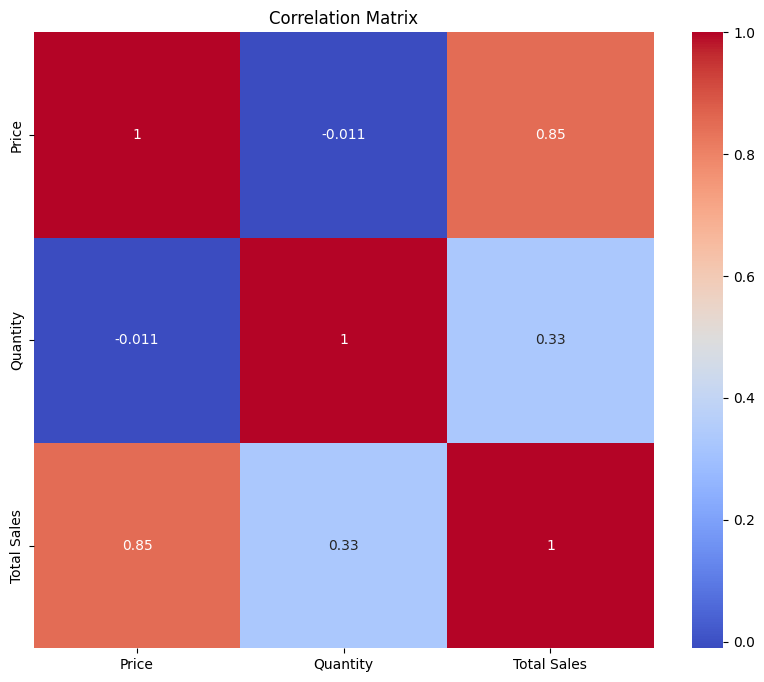

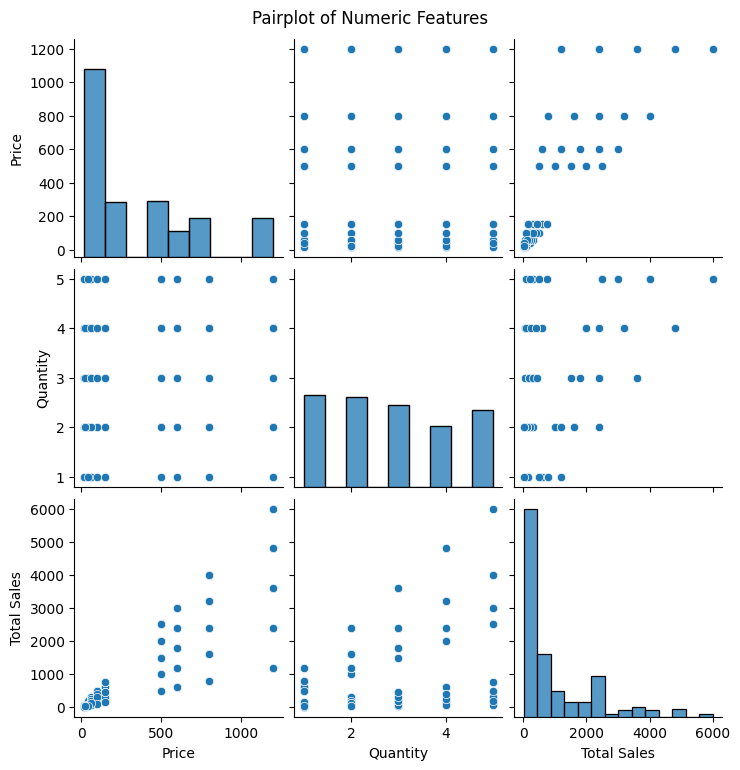

In [7]:
# 3. Correlation Matrix and Pairplot
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


In [8]:
# 4. Pattern Analysis (Revised)
for column in numeric_columns:
    print(f"\nAnalysis for {column}:")
    
    # Skewness
    skewness = df[column].skew()
    print(f"Skewness: {skewness:.2f}")
    
    # Outliers: Counting values beyond mean +/- 2 std devs
    outliers = df[(df[column] > df[column].mean() + 2 * df[column].std()) | 
                  (df[column] < df[column].mean() - 2 * df[column].std())]
    print(f"Number of outliers: {len(outliers)}")
    
    # Inference based on skewness
    if skewness > 1:
        print(f"  - {column} has a positive skew, might need transformation (e.g., log).")
    elif skewness < -1:
        print(f"  - {column} has a negative skew, might need transformation (e.g., log).")
    else:
        print(f"  - {column} is approximately normally distributed.")




Analysis for Price:
Skewness: 1.06
Number of outliers: 24
  - Price has a positive skew, might need transformation (e.g., log).

Analysis for Quantity:
Skewness: 0.18
Number of outliers: 0
  - Quantity is approximately normally distributed.

Analysis for Total Sales:
Skewness: 1.69
Number of outliers: 17
  - Total Sales has a positive skew, might need transformation (e.g., log).



Basic Feature Inferences from Visuals:


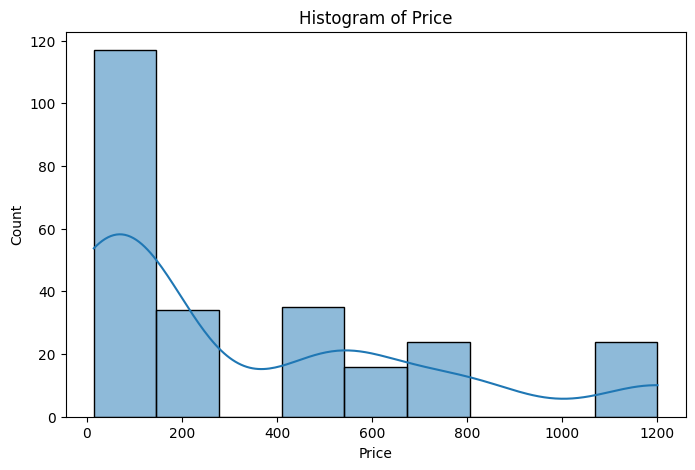

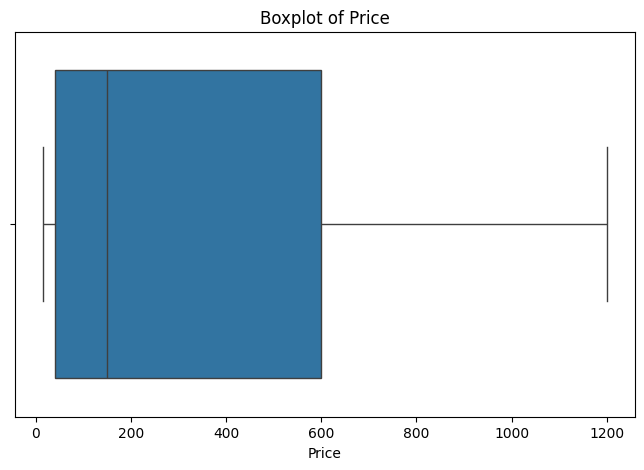


Inferences for Price:
  - The distribution is right-skewed. Consider log transformation.
  - There are outliers present in Price, which may require treatment.


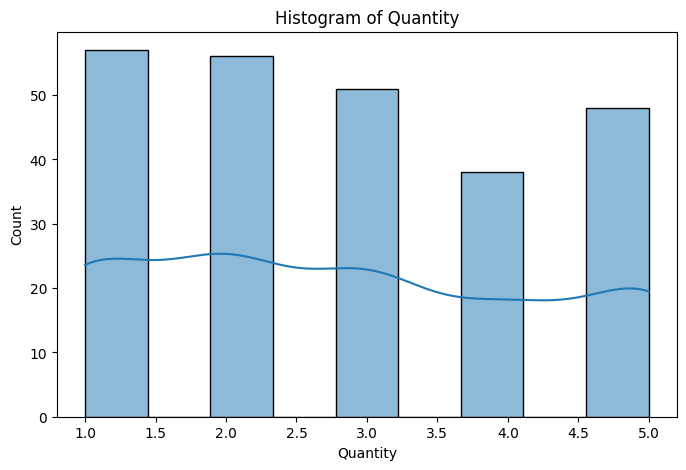

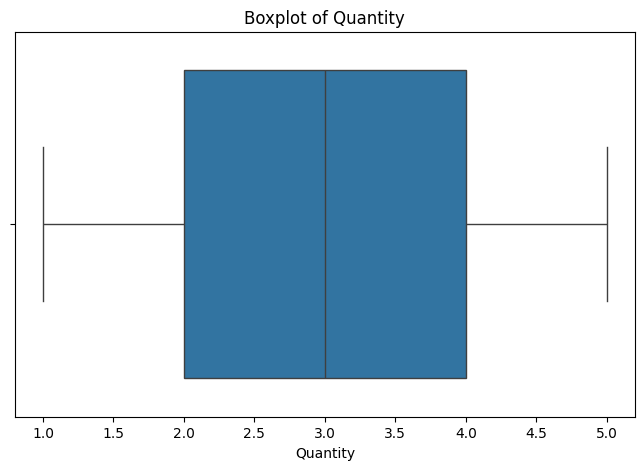


Inferences for Quantity:
  - The distribution is approximately normal.


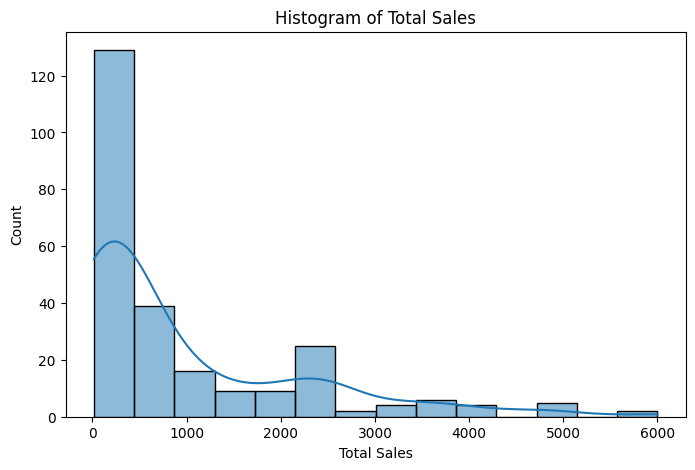

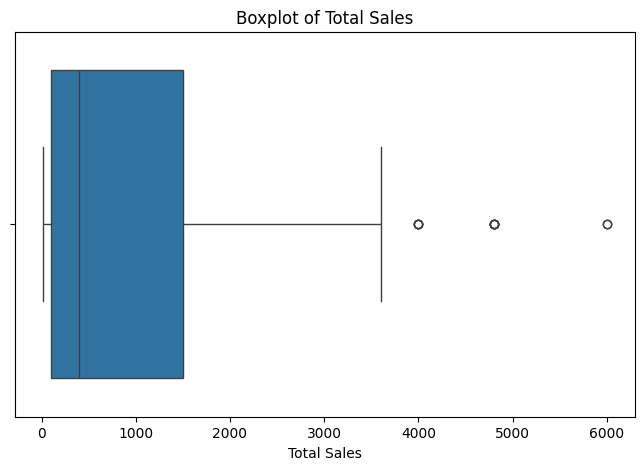


Inferences for Total Sales:
  - The distribution is right-skewed. Consider log transformation.
  - There are outliers present in Total Sales, which may require treatment.


In [9]:
# 5. Basic Feature Inferences from Visuals
print("\nBasic Feature Inferences from Visuals:")
for column in numeric_columns:
    # Histogram observations
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()
    
    # Boxplot observations
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Make inferences based on the plots
    print(f"\nInferences for {column}:")
    if df[column].skew() > 1:
        print(f"  - The distribution is right-skewed. Consider log transformation.")
    elif df[column].skew() < -1:
        print(f"  - The distribution is left-skewed. Consider log transformation.")
    else:
        print(f"  - The distribution is approximately normal.")
    
    if len(df[(df[column] > df[column].mean() + 2 * df[column].std()) | 
              (df[column] < df[column].mean() - 2 * df[column].std())]) > 0:
        print(f"  - There are outliers present in {column}, which may require treatment.")
